### Starting the notebook by importing everything that we could need.

In [1]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import plot_confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [2]:
df = pd.read_csv('churn.csv')

### Time to assess the data set

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [6]:
df.corr()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


In [7]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

### Here we only have 4 object columns and one bool column

In [8]:
df.columns.to_series().groupby(df.dtypes).groups

{bool: ['churn'], int64: ['account length', 'area code', 'number vmail messages', 'total day calls', 'total eve calls', 'total night calls', 'total intl calls', 'customer service calls'], float64: ['total day minutes', 'total day charge', 'total eve minutes', 'total eve charge', 'total night minutes', 'total night charge', 'total intl minutes', 'total intl charge'], object: ['state', 'phone number', 'international plan', 'voice mail plan']}

In [9]:
df.isna().any()

state                     False
account length            False
area code                 False
phone number              False
international plan        False
voice mail plan           False
number vmail messages     False
total day minutes         False
total day calls           False
total day charge          False
total eve minutes         False
total eve calls           False
total eve charge          False
total night minutes       False
total night calls         False
total night charge        False
total intl minutes        False
total intl calls          False
total intl charge         False
customer service calls    False
churn                     False
dtype: bool

In [10]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

### True here represents clients who have left the company. Obviously a lot more 'False' or people who have stayed with the company. Now need to change these to 0 and 1 values. 

In [11]:
le = LabelEncoder()

In [12]:
df = df.drop(['phone number','state'],axis=1)

### Phone number is object class but cannot be label encoded, also does not seem to be necessart for analysis so dropping the field. 

In [13]:
df['churn']= le.fit_transform(df['churn'])

In [14]:
df['churn'].head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [15]:
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [16]:
df['international plan']= le.fit_transform(df['international plan'])

In [17]:
df['voice mail plan']= le.fit_transform(df['voice mail plan'])

In [18]:
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [19]:

dataset2 = df[['churn','international plan','voice mail plan','account length', 'number vmail messages', 'total day calls', 'total eve calls', 'total night calls', 'total intl calls', 'customer service calls','total day minutes', 'total day charge', 'total eve minutes', 'total eve charge', 'total intl minutes', 'total intl charge']]
###

#
#

In [20]:
dataset2.shape

(3333, 16)

In [21]:
dataset2['international plan'].head()

0    0
1    0
2    0
3    1
4    1
Name: international plan, dtype: int64

In [22]:
dataset2

,churn,international plan,voice mail plan,account length,number vmail messages,total day calls,total eve calls,total night calls,total intl calls,customer service calls,total day minutes,total day charge,total eve minutes,total eve charge,total intl minutes,total intl charge
0,0,0,1,128,25,110,99,91,3,1,265.1,45.07,197.4,16.78,10.0,2.70
1,0,0,1,107,26,123,103,103,3,1,161.6,27.47,195.5,16.62,13.7,3.70
2,0,0,0,137,0,114,110,104,5,0,243.4,41.38,121.2,10.30,12.2,3.29
3,0,1,0,84,0,71,88,89,7,2,299.4,50.90,61.9,5.26,6.6,1.78
4,0,1,0,75,0,113,122,121,3,3,166.7,28.34,148.3,12.61,10.1,2.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0,0,1,192,36,77,126,83,6,2,156.2,26.55,215.5,18.32,9.9,2.67
3329,0,0,0,68,0,57,55,123,4,3,231.1,39.29,153.4,13.04,9.6,2.59
3330,0,0,0,28,0,109,58,91,6,2,180.8,30.74,288.8,24.55,14.1,3.81
3331,0,1,0,184,0,105,84,137,10,2,213.8,36.35,159.6,13.57,5.0,1.35


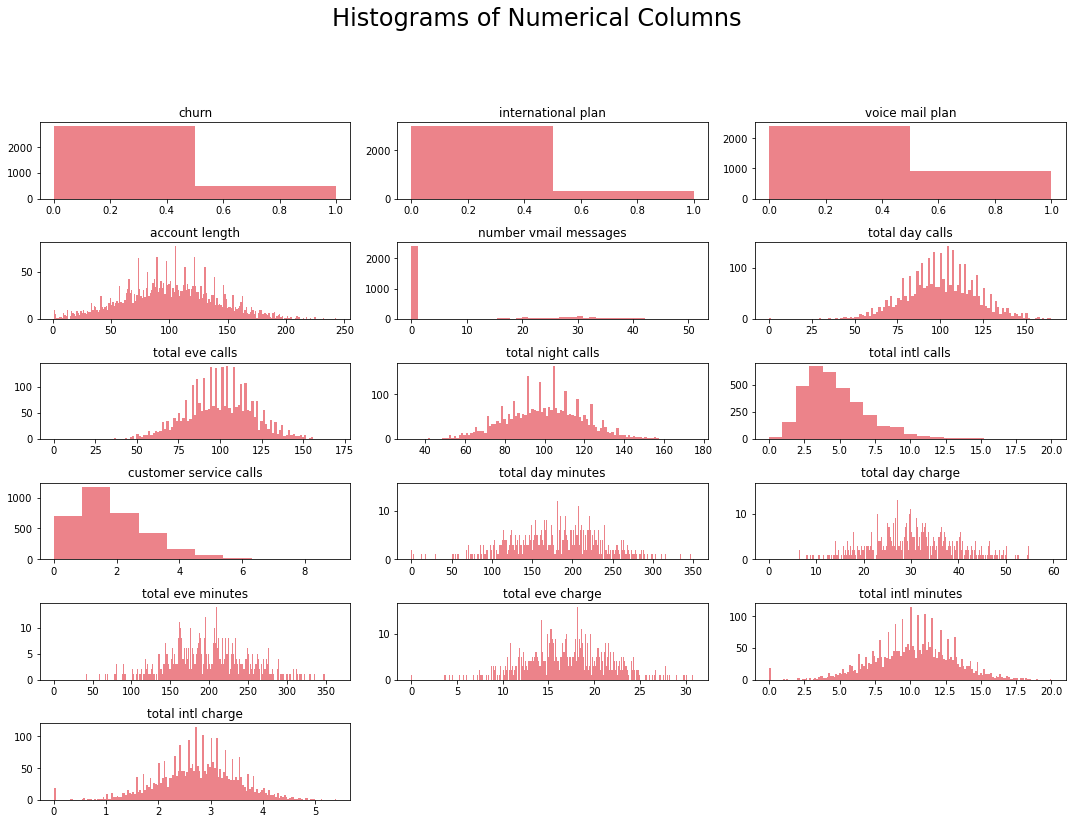

In [23]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])
    vals = np.size(dataset2.iloc[:, i].unique())
    plt.hist(dataset2.iloc[:, i], bins=vals, color = '#ec838a')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Looking at these charts we can see that the distributions for total night, day, and evening calls look about the same. I will merge these together to get a better sense of how total calls in a day effects this. Particularyly because I do not think that consumers will look very hard at distribution of calls per hour but rather over a daily or weekly basis. As well we can see that there are far more customers who are sticking with the company than are leaving. International and Voicemail plan sections we can see that much more customers do not subscribe to the plan than do.  This customer service calls chart does appear to be interesting but we will need to map this against another metric to get a better sense of the data.

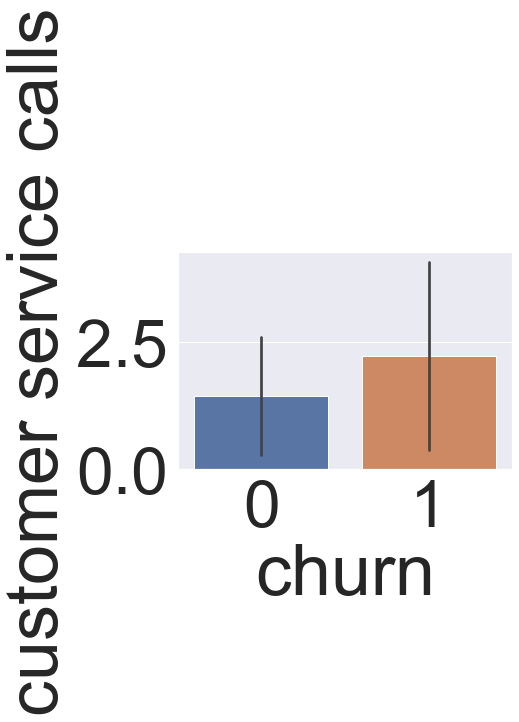

In [24]:
sns.set(font_scale=6)
sns.barplot( y='customer service calls', x='churn',data=df,ci="sd")
plt.show()

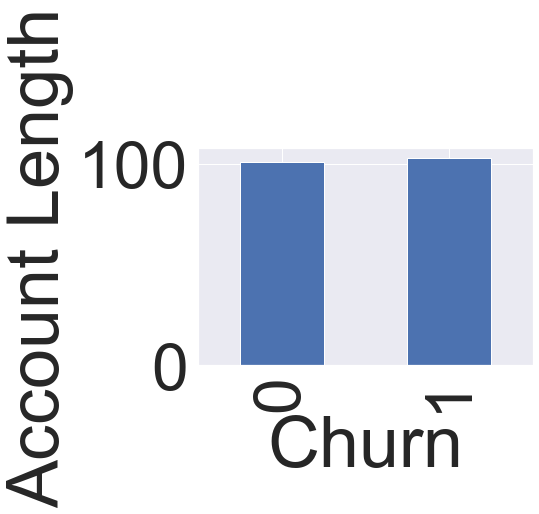

In [25]:
df.groupby('churn')['account length'].mean().plot(kind='bar') 
plt.ylabel('Account Length')
plt.xlabel('Churn')
plt.show();

In [26]:
df_account = df.groupby('churn')['account length']

<AxesSubplot:xlabel='account length', ylabel='Count'>

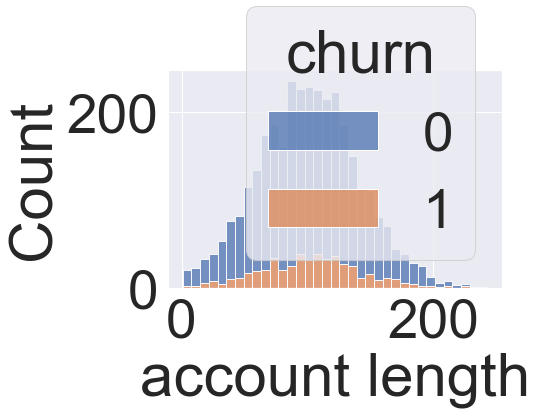

In [27]:
sns.set(font_scale=5)
sns.histplot(data = df, x = 'account length', hue = 'churn', multiple="stack")

<AxesSubplot:xlabel='churn', ylabel='customer service calls'>

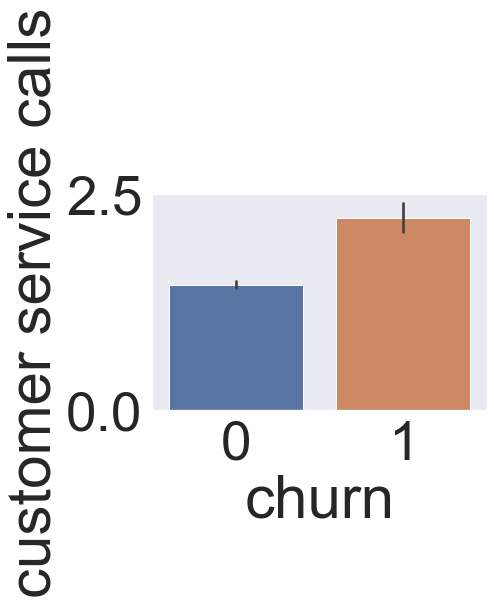

In [28]:
sns.barplot(data = df, y = 'customer service calls', x = 'churn')

In [29]:
col_list = ['customer service calls', 'account length']

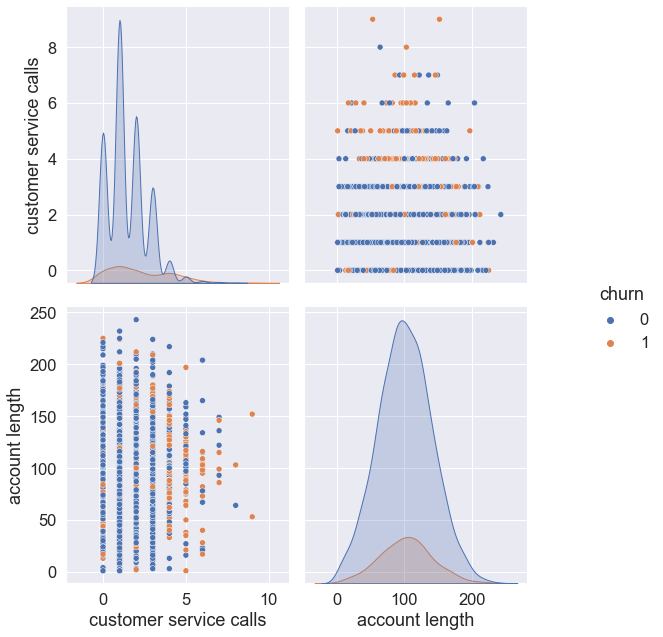

In [30]:
sns.set(font_scale=1.5)
g=sns.pairplot(hue = 'churn', 
             vars = col_list,
             data = df)
g.fig.set_size_inches(10,10)

In [31]:
y = df['churn']
X = df.drop(['churn'],axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.15,random_state=42)

In [33]:
from collections import Counter
>>> from sklearn.datasets import make_classification
>>> from imblearn.over_sampling import SMOTE 
##
oversample = SMOTE()
X, y = oversample.fit_resample(X_train, y_train)

In [34]:
y.value_counts()

1    2422
0    2422
Name: churn, dtype: int64

In [35]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [37]:
knn.score(X_test, y_test)

0.856

In [38]:
accuracy_score(y_test, y_pred)

0.856

In [39]:
def cross_validation(X_train, y_train, k, num_split = 10):
    
    X_train = X_train.values
    y_train = y_train.values
    
    score_train_list = []
    score_val_list = []
    
    for train_index, valid_index in KFold(n_splits = num_split).split(X_train):


         
        X_train_fold, X_val_fold = X_train[train_index], X_train[valid_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[valid_index]

        
        scaler = StandardScaler()
        X_tf_sc = scaler.fit_transform(X_train_fold)
       
        X_vld_sc = scaler.transform(X_val_fold)

        
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_tf_sc, y_train_fold)
        
        accuracy_train = knn.score(X_tf_sc, y_train_fold)
        accuracy_val = knn.score(X_vld_sc, y_val_fold)
        score_val_list.append(accuracy_val)
        score_train_list.append(accuracy_train)
    
    return {'k': k, 'train': np.mean(score_train_list), 'validation': np.mean(score_val_list)}

## Pipeline

In [40]:
set_config(display= 'diagram')

In [41]:
steps = [('imputer', SimpleImputer(strategy="median")), ('std_scaler', StandardScaler()),
        ('rf', DecisionTreeClassifier(random_state=42))]

pipeline = Pipeline(steps)


# Train the pipeline (tranformations & predictor)
pipeline.fit(X_train, y_train)

# Predict using the pipeline (includes the transfomers & trained predictor)
predicted = pipeline.predict(X_test)
print(predicted)

[0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 

In [42]:
pipeline.steps

[('imputer', SimpleImputer(strategy='median')),
 ('std_scaler', StandardScaler()),
 ('rf', DecisionTreeClassifier(random_state=42))]

In [43]:
def cross_validation_pip(X_train, y_train, estimator, num_split = 10):
    
    X_train = X_train.values
    y_train = y_train.values
    
    score_train_list = []
    score_val_list = []
    
    for train_index, valid_index in KFold(n_splits = num_split).split(X_train):
        
        # train and validation splitting 
        X_train_fold, X_val_fold = X_train[train_index], X_train[valid_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[valid_index]

        estimator.fit(X_train_fold, y_train_fold)
        
        # now how did we do?
        accuracy_train = estimator.score(X_train_fold, y_train_fold)
        accuracy_val = estimator.score(X_val_fold, y_val_fold)
        score_val_list.append(accuracy_val)
        score_train_list.append(accuracy_train)
    
    return {'train': np.mean(score_train_list), 'validation': np.mean(score_val_list)}

In [44]:
cross_validation_pip(X_train, y_train, pipeline)

{'train': 1.0, 'validation': 0.9167185089334593}

In [45]:
pipeline.steps.pop(-1)
# insert knn
pipeline.steps.append(
['knn', KNeighborsClassifier()])

In [46]:
pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler()),
                ['knn', KNeighborsClassifier()]])

In [47]:
cross_validation_pip(X_train,y_train,pipeline)

{'train': 0.9203045715736276, 'validation': 0.8923605235654206}

### Train value appears to be much better with KNN than with the decision tree, will try doing with this forward. 

In [48]:
# tuning the model

pipe_grid = {'imputer__strategy': ["mean", "median"],
             'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 18],
             'knn__p': [1, 2, 3, 4]}

In [49]:
gs_pipe = GridSearchCV(estimator=pipeline, 
                       param_grid=pipe_grid)

In [50]:
gs_pipe.fit(X_train, y_train);

In [51]:
gs_pipe.best_params_

{'imputer__strategy': 'mean', 'knn__n_neighbors': 3, 'knn__p': 2}

### Model is overfitting, i will go back and undo the combination of the call, charge, and minutes columns to see if this works. 

### Working much better now. 

In [52]:
gs_pipe.best_score_

0.8923433108356548

In [53]:
gs_pipe.best_estimator_

Pipeline(steps=[('imputer', SimpleImputer()), ('std_scaler', StandardScaler()),
                ['knn', KNeighborsClassifier(n_neighbors=3)]])

In [54]:
best_model = gs_pipe.best_estimator_
best_model

Pipeline(steps=[('imputer', SimpleImputer()), ('std_scaler', StandardScaler()),
                ['knn', KNeighborsClassifier(n_neighbors=3)]])

In [55]:
y_pred = best_model.predict(X_test)

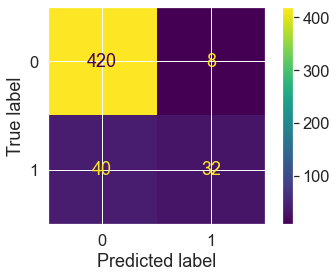

In [56]:
plot_confusion_matrix(best_model, X_test, y_test)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       428
           1       0.80      0.44      0.57        72

    accuracy                           0.90       500
   macro avg       0.86      0.71      0.76       500
weighted avg       0.90      0.90      0.89       500



###  The precision and f1 for the 1 are not great, would like to try another model.

In [58]:
pipeline.steps.pop(-1)
# insert knn
pipeline.steps.append(
['rf_class', RandomForestClassifier(random_state=42)])

In [59]:
pipeline.steps

[('imputer', SimpleImputer(strategy='median')),
 ('std_scaler', StandardScaler()),
 ['rf_class', RandomForestClassifier(random_state=42)]]

In [60]:
pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler()),
                ['rf_class', RandomForestClassifier(random_state=42)]])

In [61]:
cross_validation_pip(X_train,y_train,pipeline)

{'train': 1.0, 'validation': 0.9548337729557558}

In [62]:
pipe_grid = {
    'rf_class__max_depth':[30,50],
    'rf_class__n_estimators':[120,140],
    'rf_class__min_samples_split':[2,3],
    'rf_class__min_samples_leaf':[3,5],
}

In [63]:
gs_pipe = GridSearchCV(estimator=pipeline, 
                       param_grid=pipe_grid)

In [64]:
#pipe_grid.steps()

In [65]:
gs_pipe

GridSearchCV(estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('std_scaler', StandardScaler()),
                                       ['rf_class',
                                        RandomForestClassifier(random_state=42)]]),
             param_grid={'rf_class__max_depth': [30, 50],
                         'rf_class__min_samples_leaf': [3, 5],
                         'rf_class__min_samples_split': [2, 3],
                         'rf_class__n_estimators': [120, 140]})

In [66]:
gs_pipe.fit(X_train, y_train);

In [67]:
gs_pipe.best_params_

{'rf_class__max_depth': 30,
 'rf_class__min_samples_leaf': 3,
 'rf_class__min_samples_split': 2,
 'rf_class__n_estimators': 120}

In [68]:
gs_pipe.best_score_

0.9548195511681966

In [69]:
gs_pipe.best_estimator_

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler()),
                ['rf_class',
                 RandomForestClassifier(max_depth=30, min_samples_leaf=3,
                                        n_estimators=120, random_state=42)]])

In [70]:
best_model = gs_pipe.best_estimator_
best_model

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler()),
                ['rf_class',
                 RandomForestClassifier(max_depth=30, min_samples_leaf=3,
                                        n_estimators=120, random_state=42)]])

In [71]:
y_pred = best_model.predict(X_test)

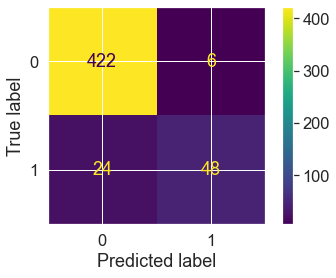

In [72]:
plot_confusion_matrix(best_model, X_test, y_test)

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       428
           1       0.89      0.67      0.76        72

    accuracy                           0.94       500
   macro avg       0.92      0.83      0.86       500
weighted avg       0.94      0.94      0.94       500



In [74]:
cv_result_df = pd.DataFrame(gs_pipe.cv_results_)
cv_result_df = cv_result_df.sort_values(by = 'rank_test_score')
cv_result_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf_class__max_depth,param_rf_class__min_samples_leaf,param_rf_class__min_samples_split,param_rf_class__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.363868,0.005086,0.010260,0.000167,30,3,2,120,"{'rf_class__max_depth': 30, 'rf_class__min_sam...",0.938272,0.955908,0.966490,0.957597,0.955830,0.954820,0.009165,1
2,0.364965,0.005451,0.010243,0.000035,30,3,3,120,"{'rf_class__max_depth': 30, 'rf_class__min_sam...",0.938272,0.955908,0.966490,0.957597,0.955830,0.954820,0.009165,1
8,0.362384,0.005931,0.010021,0.000082,50,3,2,120,"{'rf_class__max_depth': 50, 'rf_class__min_sam...",0.938272,0.955908,0.966490,0.957597,0.955830,0.954820,0.009165,1
10,0.362609,0.005999,0.010063,0.000108,50,3,3,120,"{'rf_class__max_depth': 50, 'rf_class__min_sam...",0.938272,0.955908,0.966490,0.957597,0.955830,0.954820,0.009165,1
1,0.424687,0.006619,0.011738,0.000233,30,3,2,140,"{'rf_class__max_depth': 30, 'rf_class__min_sam...",0.932981,0.957672,0.964727,0.955830,0.961131,0.954468,0.011167,5
